**OLS and WLS Regression combinations of runoff ratio, wetland type percents, and other watershed characterists**

Jessica Smith

3/17/25 - 4/28/25

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import matplotlib.pyplot as plt
from simpledbf import Dbf5
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# read in averaged flow:precip ratios for the 96 sites
average_ratios = pd.read_csv("average_event_ratios03.22.25.csv", dtype={'site_id': str}) 
average_ratios

,site_id,lat,lon,flow,normalized_flow,ratio_max_allyear,ratio_sum_3day_allyear,ratio_max_summerfall,ratio_sum_3day_summerfall
0,01200000,41.658983,-73.528458,4390.000000,20.166712,0.251902,0.193248,0.163737,0.163737
1,01302020,40.862306,-73.874389,980.800000,23.621281,0.370472,0.249070,0.321761,0.223398
2,01312000,43.966174,-74.130704,4997.333333,24.540149,1.061907,0.854277,0.357251,0.327461
3,01315500,43.700898,-73.983466,18466.666667,21.947499,0.531907,0.423391,0.334060,0.323568
4,01318500,43.318960,-73.844289,31900.000000,18.013500,0.541590,0.443783,NaN,NaN
...,...,...,...,...,...,...,...,...,...
91,04271815,44.902262,-73.415135,960.500000,18.002114,0.545098,0.317950,0.421214,0.269958
92,04275000,44.438936,-73.681528,4897.692308,23.366742,0.849791,0.629475,0.626369,0.517644
93,04275500,44.451436,-73.642638,10175.000000,21.612372,1.474735,0.882041,0.525266,0.329132
94,04276500,44.358383,-73.396797,6466.666667,22.786361,0.445645,0.325230,0.292753,0.268657


In [4]:
# read in wetland data
wetland_percents = pd.read_csv("wetland_percent_by_site.csv", dtype={'GAGE_ID': str})
wetland_percents

,GAGE_ID,pond,emergent,forest_shrub,lake,other
0,01200000,0.650511,2.615781,4.107622,1.230653,0.00000
1,01301000,0.678302,0.153897,1.018828,0.471606,0.00000
2,01302020,0.427339,0.127383,0.418530,2.280841,0.00000
3,01312000,0.471686,0.827300,6.246026,3.212307,0.00000
4,01315000,0.196154,0.654754,6.043559,6.103961,0.00000
...,...,...,...,...,...,...
144,04275000,0.142515,0.206294,2.366601,0.300900,0.00000
145,04275500,0.238786,0.404720,4.238271,1.472256,0.00000
146,04276500,0.295855,0.490107,4.130343,0.551704,0.00000
147,04279000,0.340370,0.209435,2.813330,17.817335,0.00000


In [5]:
# combine datasets
# rename 'GAGE_ID' column 'site_id'
wetland_percents.rename(columns={"GAGE_ID": "site_id"}, inplace=True)
# Merge datasets while keeping only site_ids that exist in the smaller dataset
ratio_percents = pd.merge(average_ratios, wetland_percents, on="site_id", how="left")
ratio_percents

,site_id,lat,lon,flow,normalized_flow,ratio_max_allyear,ratio_sum_3day_allyear,ratio_max_summerfall,ratio_sum_3day_summerfall,pond,emergent,forest_shrub,lake,other
0,01200000,41.658983,-73.528458,4390.000000,20.166712,0.251902,0.193248,0.163737,0.163737,0.650511,2.615781,4.107622,1.230653,0.00000
1,01302020,40.862306,-73.874389,980.800000,23.621281,0.370472,0.249070,0.321761,0.223398,0.427339,0.127383,0.418530,2.280841,0.00000
2,01312000,43.966174,-74.130704,4997.333333,24.540149,1.061907,0.854277,0.357251,0.327461,0.471686,0.827300,6.246026,3.212307,0.00000
3,01315500,43.700898,-73.983466,18466.666667,21.947499,0.531907,0.423391,0.334060,0.323568,0.407495,0.760752,6.795555,3.132028,0.00000
4,01318500,43.318960,-73.844289,31900.000000,18.013500,0.541590,0.443783,NaN,NaN,0.472002,0.567832,5.988775,2.826608,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,04271815,44.902262,-73.415135,960.500000,18.002114,0.545098,0.317950,0.421214,0.269958,0.372177,1.758486,8.233123,0.486309,0.00000
92,04275000,44.438936,-73.681528,4897.692308,23.366742,0.849791,0.629475,0.626369,0.517644,0.142515,0.206294,2.366601,0.300900,0.00000
93,04275500,44.451436,-73.642638,10175.000000,21.612372,1.474735,0.882041,0.525266,0.329132,0.238786,0.404720,4.238271,1.472256,0.00000
94,04276500,44.358383,-73.396797,6466.666667,22.786361,0.445645,0.325230,0.292753,0.268657,0.295855,0.490107,4.130343,0.551704,0.00000


In [6]:
# make new df of summerfall data- will be shorter
# Load your dataframe (assuming it's already loaded as df)
columns_to_keep = [
    "site_id", "lat", "lon", "flow", "normalized_flow", 
    "ratio_max_summerfall", "ratio_sum_3day_summerfall",
    "pond", "emergent", "forest_shrub", "lake", "other"
]

summerfall = ratio_percents[columns_to_keep]
summerfall = summerfall.dropna(subset=["ratio_max_summerfall", "ratio_sum_3day_summerfall"])
summerfall

,site_id,lat,lon,flow,normalized_flow,ratio_max_summerfall,ratio_sum_3day_summerfall,pond,emergent,forest_shrub,lake,other
0,01200000,41.658983,-73.528458,4390.000000,20.166712,0.163737,0.163737,0.650511,2.615781,4.107622,1.230653,0.0
1,01302020,40.862306,-73.874389,980.800000,23.621281,0.321761,0.223398,0.427339,0.127383,0.418530,2.280841,0.0
2,01312000,43.966174,-74.130704,4997.333333,24.540149,0.357251,0.327461,0.471686,0.827300,6.246026,3.212307,0.0
3,01315500,43.700898,-73.983466,18466.666667,21.947499,0.334060,0.323568,0.407495,0.760752,6.795555,3.132028,0.0
5,01321000,43.352847,-74.270415,12065.238095,23.358954,0.348946,0.308608,0.379656,0.688198,7.015564,2.904193,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
90,04270200,44.940045,-74.556299,1828.571429,18.966984,0.485237,0.340332,0.123579,0.292183,7.382903,0.183001,0.0
91,04271815,44.902262,-73.415135,960.500000,18.002114,0.421214,0.269958,0.372177,1.758486,8.233123,0.486309,0.0
92,04275000,44.438936,-73.681528,4897.692308,23.366742,0.626369,0.517644,0.142515,0.206294,2.366601,0.300900,0.0
93,04275500,44.451436,-73.642638,10175.000000,21.612372,0.525266,0.329132,0.238786,0.404720,4.238271,1.472256,0.0


In [7]:
#weights data for WLS
weights_data = pd.read_csv("weights_data.csv")
weights_data

,ratio_max_allyear,ratio_max_summerfall
0,2,1
1,15,10
2,14,4
3,9,3
4,1,0
...,...,...
91,2,1
92,13,4
93,10,4
94,3,2


In [8]:
# make weights for the summerfall data- this has fewer rows than the allyear. Need to manually keep row 49 as it was 0 and not Nan
# If we don't keep row 49, then the dataframe is one row short for the WLS
weights_data_summerfall = weights_data[(weights_data['ratio_max_summerfall'] != 0) | (weights_data.index == 49)]
weights_data_summerfall

,ratio_max_allyear,ratio_max_summerfall
0,2,1
1,15,10
2,14,4
3,9,3
5,21,3
...,...,...
90,6,1
91,2,1
92,13,4
93,10,4


Perform Regression- OLS first

Need to have 2 separate datasets for all year vs summertime bc the Nans mess up the regression when trying to regress the sumerfall versions (they are different lengths)

In [9]:
# For all year max:
#  Define the dependent variable (target)
y = ratio_percents['ratio_max_allyear']

# Define the independent variables (predictors) and add a constant
X = ratio_percents[['forest_shrub', 'emergent', 'pond', 'lake', 'other']]
X_with_const = sm.add_constant(X)

# Step 1: Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary:")
print(ols_model.summary())

Initial OLS Summary:
                            OLS Regression Results                            
Dep. Variable:      ratio_max_allyear   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     7.653
Date:                Tue, 06 May 2025   Prob (F-statistic):           4.96e-06
Time:                        12:10:45   Log-Likelihood:                 8.6122
No. Observations:                  96   AIC:                            -5.224
Df Residuals:                      90   BIC:                             10.16
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.7712    

In [10]:
# For all year 3day sum:
#  Define the dependent variable (target)
y = ratio_percents['ratio_sum_3day_allyear']

# Define the independent variables (predictors) and add a constant
X = ratio_percents[['forest_shrub', 'emergent', 'pond', 'lake', 'other']]
X_with_const = sm.add_constant(X)

# Step 1: Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary:")
print(ols_model.summary())


Initial OLS Summary:
                              OLS Regression Results                              
Dep. Variable:     ratio_sum_3day_allyear   R-squared:                       0.261
Model:                                OLS   Adj. R-squared:                  0.220
Method:                     Least Squares   F-statistic:                     6.366
Date:                    Tue, 06 May 2025   Prob (F-statistic):           4.18e-05
Time:                            12:10:45   Log-Likelihood:                 27.006
No. Observations:                      96   AIC:                            -42.01
Df Residuals:                          90   BIC:                            -26.63
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [11]:
# calculate the VIF (variance inflation factor)- a VIF value greater than 10 is bad

X = ratio_percents.drop(columns=['site_id', 'lat',	'lon', 'flow', 'normalized_flow', 'ratio_max_allyear', 
                          'ratio_sum_3day_allyear', 'ratio_max_summerfall', 'ratio_sum_3day_summerfall'])
# Add a constant (intercept) term to the predictors matrix X (for VIF calculation)
X = sm.add_constant(X)
# Compute and view the VIF
vif = pd.DataFrame()
vif['Predictor'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Sort the VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

      Predictor       VIF
0         const  4.077950
3  forest_shrub  1.566279
2      emergent  1.547607
1          pond  1.354197
4          lake  1.242576
5         other  1.011505


The VIF factors are not very high, meaning there is almost no correlation between the wetland types

In [12]:
# For summer/fall max:
#  Define the dependent variable (target)
y = summerfall['ratio_max_summerfall']

# Define the independent variables (predictors) and add a constant
X = summerfall[['forest_shrub', 'emergent', 'pond', 'lake', 'other']]
X_with_const = sm.add_constant(X)

# Step 1: Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary:")
print(ols_model.summary())


Initial OLS Summary:
                             OLS Regression Results                             
Dep. Variable:     ratio_max_summerfall   R-squared:                       0.227
Model:                              OLS   Adj. R-squared:                  0.177
Method:                   Least Squares   F-statistic:                     4.570
Date:                  Tue, 06 May 2025   Prob (F-statistic):            0.00104
Time:                          12:10:46   Log-Likelihood:                 3.6142
No. Observations:                    84   AIC:                             4.772
Df Residuals:                        78   BIC:                             19.36
Df Model:                             5                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

In [13]:
# For summer/fall 3day:
#  Define the dependent variable (target)
y = summerfall['ratio_sum_3day_summerfall']

# Define the independent variables (predictors) and add a constant
X = summerfall[['forest_shrub', 'emergent', 'pond', 'lake', 'other']]
X_with_const = sm.add_constant(X)

# Step 1: Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary:")
print(ols_model.summary())


Initial OLS Summary:
                                OLS Regression Results                               
Dep. Variable:     ratio_sum_3day_summerfall   R-squared:                       0.181
Model:                                   OLS   Adj. R-squared:                  0.129
Method:                        Least Squares   F-statistic:                     3.455
Date:                       Tue, 06 May 2025   Prob (F-statistic):            0.00714
Time:                               12:10:46   Log-Likelihood:                 22.517
No. Observations:                         84   AIC:                            -33.03
Df Residuals:                             78   BIC:                            -18.45
Df Model:                                  5                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

In [14]:
# calculate the VIF (variance inflation factor)- a VIF value greater than 10 is bad

X = summerfall.drop(columns=['site_id', 'lat',	'lon', 'flow', 'normalized_flow', 
                          'ratio_max_summerfall', 'ratio_sum_3day_summerfall'])
# Add a constant (intercept) term to the predictors matrix X (for VIF calculation)
X = sm.add_constant(X)
# Compute and view the VIF
vif = pd.DataFrame()
vif['Predictor'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Sort the VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

      Predictor       VIF
0         const  4.167631
3  forest_shrub  1.597040
2      emergent  1.523328
1          pond  1.342610
4          lake  1.249418
5         other  1.013247


Similar VIF numbers as the allyear. Summerfall is slightly higher on about a .01 magnitude

Now lets add the watershed characteristics in into the regression!

In [15]:
watershed_characteristics = pd.read_csv("watershed_characteristics.csv", dtype={'STAID': str})
watershed_characteristics

,STAID,DRAIN_SQKM,ELEV_MEAN_M_BASIN,SLOPE_PCT,ROCKDEPAVE,DEVNLCD06,TOPWET,PERMAVE,BFI_AVE,HGD,...,ARTIFPATH_MAINSTEM_PCT,DDENS_2009,STOR_NID_2009,STOR_NOR_2009,MAJ_NDAMS_2009,MAJ_DDENS_2009,RAW_DIS_NEAREST_DAM,RAW_AVG_DIS_ALLDAMS,RAW_DIS_NEAREST_MAJ_DAM,RAW_AVG_DIS_ALL_MAJ_DAMS
0,01011000,3186.8,363.1,5.9,47.45,0.05,11.50,1.56,49.7,30.29,...,87.89,0.06,38.34,30.20,1,0.03,21.9,43.8,65.8,65.8
1,01013500,2252.7,273.3,6.9,48.21,1.09,12.11,1.47,53.6,24.97,...,58.05,0.13,0.81,0.77,0,0.00,10.6,24.4,-999.0,-999.0
2,01015800,2313.8,278.3,4.6,52.29,0.27,12.19,1.91,52.0,34.30,...,99.63,0.04,12.20,12.20,1,0.04,42.7,42.7,42.7,42.7
3,01016500,847.8,324.6,6.8,49.66,0.03,11.80,1.84,52.1,28.93,...,21.05,0.12,0.92,0.79,0,0.00,43.5,43.5,-999.0,-999.0
4,01017000,4278.9,271.8,4.8,52.89,0.54,12.12,1.85,52.2,32.98,...,99.86,0.09,23.90,23.87,2,0.05,1.6,42.4,27.7,50.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9062,394308105413800,207.6,3495.5,39.0,46.72,2.36,9.75,7.21,68.4,27.11,...,0.00,1.93,29.76,24.24,2,0.96,4.8,6.4,6.4,7.1
9063,394839104570300,477.5,1762.2,2.7,56.38,41.24,12.66,4.15,43.7,7.47,...,5.81,1.88,144.88,104.38,3,0.63,10.2,22.2,10.2,21.1
9064,401733105392404,7.0,3503.8,59.9,49.47,0.00,8.29,8.86,67.0,20.16,...,31.96,0.00,0.00,0.00,0,0.00,-999.0,-999.0,-999.0,-999.0
9065,402114105350101,104.8,3234.3,38.9,50.28,0.80,9.60,7.14,65.3,22.37,...,0.00,0.00,0.00,0.00,0,0.00,-999.0,-999.0,-999.0,-999.0


In [16]:
# combine datasets
# rename 'STAID' column 'site_id'
watershed_characteristics.rename(columns={"STAID": "site_id"}, inplace=True)
# Merge datasets while keeping only site_ids that exist in the smaller dataset
allyear = pd.merge(ratio_percents, watershed_characteristics, on="site_id", how="left")
#for summer fall
summerfall_more = pd.merge(summerfall, watershed_characteristics, on="site_id", how="left")
summerfall_more

,site_id,lat,lon,flow,normalized_flow,ratio_max_summerfall,ratio_sum_3day_summerfall,pond,emergent,forest_shrub,...,ARTIFPATH_MAINSTEM_PCT,DDENS_2009,STOR_NID_2009,STOR_NOR_2009,MAJ_NDAMS_2009,MAJ_DDENS_2009,RAW_DIS_NEAREST_DAM,RAW_AVG_DIS_ALLDAMS,RAW_DIS_NEAREST_MAJ_DAM,RAW_AVG_DIS_ALL_MAJ_DAMS
0,01200000,41.658983,-73.528458,4390.000000,20.166712,0.163737,0.163737,0.650511,2.615781,4.107622,...,0.00,4.51,10.15,7.83,1,0.19,3.3,13.7,3.7,3.7
1,01302020,40.862306,-73.874389,980.800000,23.621281,0.321761,0.223398,0.427339,0.127383,0.418530,...,2.60,6.89,1498.39,1212.07,2,1.97,6.1,18.8,6.1,15.7
2,01312000,43.966174,-74.130704,4997.333333,24.540149,0.357251,0.327461,0.471686,0.827300,6.246026,...,19.60,1.41,11.87,9.04,0,0.00,5.5,12.9,-999.0,-999.0
3,01315500,43.700898,-73.983466,18466.666667,21.947499,0.334060,0.323568,0.407495,0.760752,6.795555,...,59.19,1.02,120.95,114.67,3,0.15,19.9,33.0,22.5,28.7
4,01321000,43.352847,-74.270415,12065.238095,23.358954,0.348946,0.308608,0.379656,0.688198,7.015564,...,45.71,0.40,5.52,4.89,0,0.00,4.4,18.0,-999.0,-999.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,04270200,44.940045,-74.556299,1828.571429,18.966984,0.485237,0.340332,0.123579,0.292183,7.382903,...,2.05,0.42,57.55,49.99,1,0.42,29.4,29.4,29.4,29.4
80,04271815,44.902262,-73.415135,960.500000,18.002114,0.421214,0.269958,0.372177,1.758486,8.233123,...,11.03,0.77,2.91,2.91,0,0.00,6.4,6.4,-999.0,-999.0
81,04275000,44.438936,-73.681528,4897.692308,23.366742,0.626369,0.517644,0.142515,0.206294,2.366601,...,22.28,0.59,2.58,1.64,0,0.00,5.0,16.2,-999.0,-999.0
82,04275500,44.451436,-73.642638,10175.000000,21.612372,0.525266,0.329132,0.238786,0.404720,4.238271,...,30.17,1.13,163.03,162.05,2,0.17,4.8,21.1,15.1,23.8


In [17]:
allyear

,site_id,lat,lon,flow,normalized_flow,ratio_max_allyear,ratio_sum_3day_allyear,ratio_max_summerfall,ratio_sum_3day_summerfall,pond,...,ARTIFPATH_MAINSTEM_PCT,DDENS_2009,STOR_NID_2009,STOR_NOR_2009,MAJ_NDAMS_2009,MAJ_DDENS_2009,RAW_DIS_NEAREST_DAM,RAW_AVG_DIS_ALLDAMS,RAW_DIS_NEAREST_MAJ_DAM,RAW_AVG_DIS_ALL_MAJ_DAMS
0,01200000,41.658983,-73.528458,4390.000000,20.166712,0.251902,0.193248,0.163737,0.163737,0.650511,...,0.00,4.51,10.15,7.83,1,0.19,3.3,13.7,3.7,3.7
1,01302020,40.862306,-73.874389,980.800000,23.621281,0.370472,0.249070,0.321761,0.223398,0.427339,...,2.60,6.89,1498.39,1212.07,2,1.97,6.1,18.8,6.1,15.7
2,01312000,43.966174,-74.130704,4997.333333,24.540149,1.061907,0.854277,0.357251,0.327461,0.471686,...,19.60,1.41,11.87,9.04,0,0.00,5.5,12.9,-999.0,-999.0
3,01315500,43.700898,-73.983466,18466.666667,21.947499,0.531907,0.423391,0.334060,0.323568,0.407495,...,59.19,1.02,120.95,114.67,3,0.15,19.9,33.0,22.5,28.7
4,01318500,43.318960,-73.844289,31900.000000,18.013500,0.541590,0.443783,NaN,NaN,0.472002,...,75.99,1.29,85.84,78.82,7,0.16,0.6,53.3,35.8,49.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,04271815,44.902262,-73.415135,960.500000,18.002114,0.545098,0.317950,0.421214,0.269958,0.372177,...,11.03,0.77,2.91,2.91,0,0.00,6.4,6.4,-999.0,-999.0
92,04275000,44.438936,-73.681528,4897.692308,23.366742,0.849791,0.629475,0.626369,0.517644,0.142515,...,22.28,0.59,2.58,1.64,0,0.00,5.0,16.2,-999.0,-999.0
93,04275500,44.451436,-73.642638,10175.000000,21.612372,1.474735,0.882041,0.525266,0.329132,0.238786,...,30.17,1.13,163.03,162.05,2,0.17,4.8,21.1,15.1,23.8
94,04276500,44.358383,-73.396797,6466.666667,22.786361,0.445645,0.325230,0.292753,0.268657,0.295855,...,5.14,0.43,8.50,7.34,0,0.00,13.0,17.7,-999.0,-999.0


In [18]:
# how many sites have at least one event in the time frame in the summer/fall?
summerfall_more["CLASS"].value_counts()

CLASS
Non-ref    84
Name: count, dtype: int64

They are all Non-ref sites, meaning that human interaction has changed the landscape of the area. This means we should include variables like dams

Initial OLS Summary: ratio_max_allyear
                            OLS Regression Results                            
Dep. Variable:      ratio_max_allyear   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.478
Method:                 Least Squares   F-statistic:                     8.239
Date:                Tue, 06 May 2025   Prob (F-statistic):           5.55e-10
Time:                        12:10:49   Log-Likelihood:                 29.259
No. Observations:                  96   AIC:                            -32.52
Df Residuals:                      83   BIC:                            0.8176
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

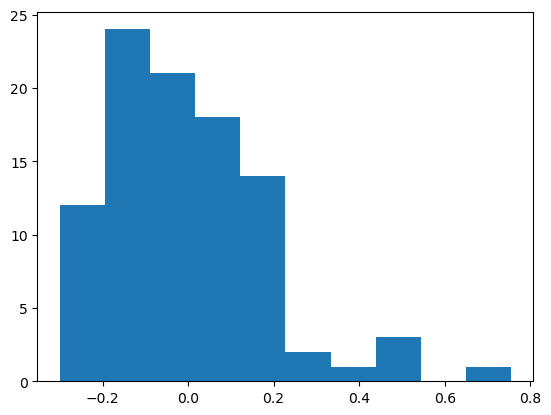

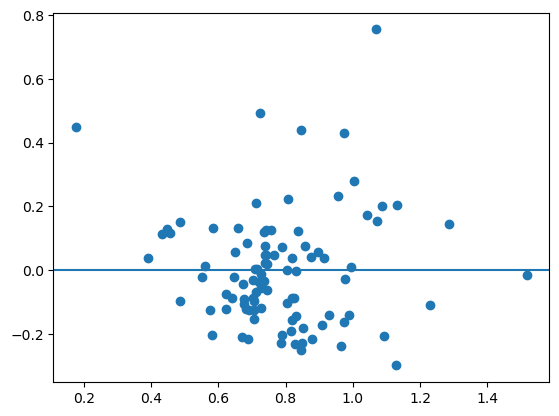

In [19]:
# For allyear 3day/ max with more watershed characteristics:
#  Define the dependent variable (target)
#y = allyear['ratio_sum_3day_allyear']
y = allyear['ratio_max_allyear']

# Define the independent variables (predictors) and add a constant
#X = allyear[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "ELEV_MEAN_M_BASIN", "SLOPE_PCT", 
#             "ROCKDEPAVE", "DEVNLCD06", "TOPWET", "PERMAVE", "BFI_AVE", "HGD", "HGC", "HGCD"]]
#shorter list of characteristics (the most important)
#X = allyear[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT", "DEVNLCD06", "TOPWET",'HGD','HGC', 'STOR_NOR_2009', 'MAJ_DDENS_2009', 'ARTIFPATH_MAINSTEM_PCT' ]]
#X = allyear[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT", "TOPWET",'HGD','HGC', "PERMAVE", "BFI_AVE",'HGCD', 'RAW_DIS_NEAREST_MAJ_DAM', 'STOR_NOR_2009', 'DDENS_2009']]
#X = allyear[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT", 
#                     "TOPWET", 'HGD','HGC', "PERMAVE", "BFI_AVE",'HGCD', 'STOR_NOR_2009', 'DEVNLCD06']]
X = allyear[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT",'HGD', "PERMAVE", "HGC", "HGCD", 'DEVNLCD06', 'DDENS_2009']]
X_with_const = sm.add_constant(X)

# Step 1: Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary: ratio_max_allyear")
print(ols_model.summary())

plt.hist(ols_model.resid)
plt.show()

plt.scatter(ols_model.fittedvalues,ols_model.resid)
plt.axhline(0)
plt.show()


Weighted Least Squares Summary:
                            WLS Regression Results                            
Dep. Variable:      ratio_max_allyear   R-squared:                       0.644
Model:                            WLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     12.51
Date:                Tue, 06 May 2025   Prob (F-statistic):           4.19e-14
Time:                        12:11:15   Log-Likelihood:                 8.0896
No. Observations:                  96   AIC:                             9.821
Df Residuals:                      83   BIC:                             43.16
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          

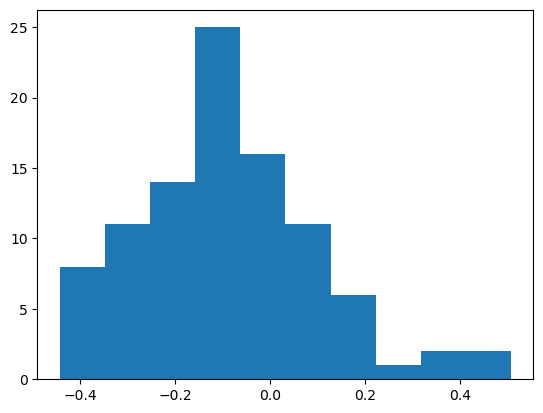

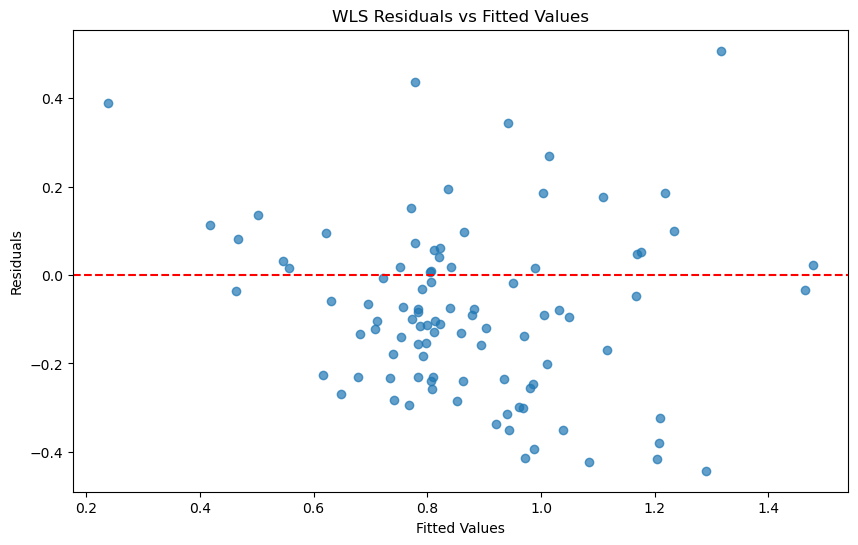

In [20]:
# Add the weights for WLS Model:
# weight by number of runoff ratios per site (nmber of obs)
observations = weights_data.iloc[:,0]

# Fit WLS model
wls_model = sm.WLS(np.sqrt(y), X_with_const, weights=observations).fit()
print("\nWeighted Least Squares Summary:")
print(wls_model.summary())

plt.hist(wls_model.resid)
plt.show()

# Plot Residuals for WLS
wls_residuals = wls_model.resid
plt.figure(figsize=(10, 6))
plt.scatter(wls_model.fittedvalues, wls_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('WLS Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

Initial OLS Summary: ratio_sum_3day_allyear
                              OLS Regression Results                              
Dep. Variable:     ratio_sum_3day_allyear   R-squared:                       0.518
Model:                                OLS   Adj. R-squared:                  0.448
Method:                     Least Squares   F-statistic:                     7.422
Date:                    Tue, 06 May 2025   Prob (F-statistic):           4.38e-09
Time:                            12:11:16   Log-Likelihood:                 47.463
No. Observations:                      96   AIC:                            -68.93
Df Residuals:                          83   BIC:                            -35.59
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------

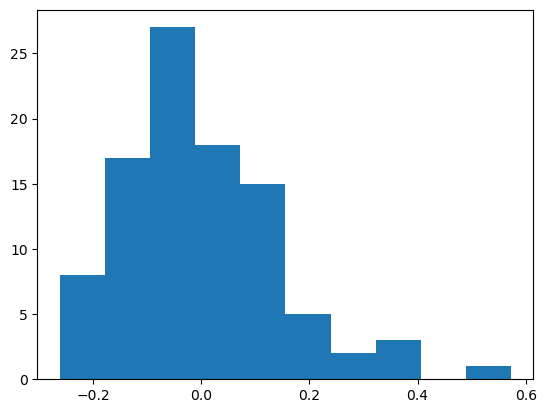

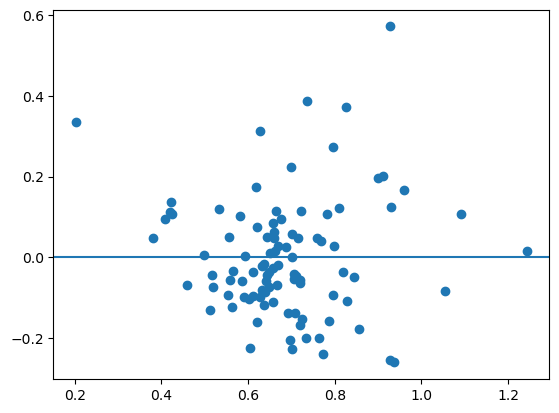


Weighted Least Squares Summary:
                              WLS Regression Results                              
Dep. Variable:     ratio_sum_3day_allyear   R-squared:                       0.640
Model:                                WLS   Adj. R-squared:                  0.587
Method:                     Least Squares   F-statistic:                     12.27
Date:                    Tue, 06 May 2025   Prob (F-statistic):           6.76e-14
Time:                            12:11:16   Log-Likelihood:                 27.317
No. Observations:                      96   AIC:                            -28.63
Df Residuals:                          83   BIC:                             4.703
Df Model:                              12                                         
Covariance Type:                nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------

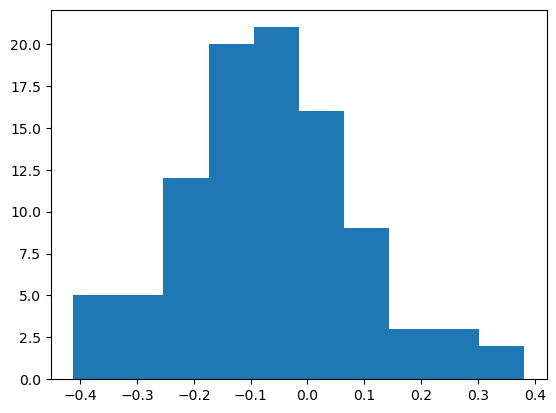

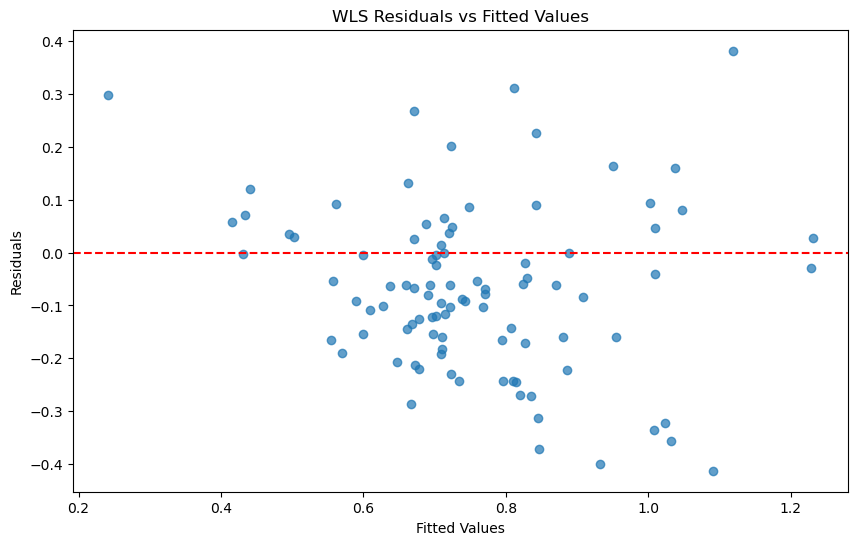

In [21]:
# For allyear 3day/ max with more watershed characteristics:
#  Define the dependent variable (target)
y = allyear['ratio_sum_3day_allyear']
#y = allyear['ratio_max_allyear']

# Define the independent variables (predictors) and add a constant
X = allyear[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT",'HGD', "PERMAVE", "HGC", "HGCD", 'DEVNLCD06', 'DDENS_2009']]
X_with_const = sm.add_constant(X)

# Step 1: Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary: ratio_sum_3day_allyear")
print(ols_model.summary())

plt.hist(ols_model.resid)
plt.show()

plt.scatter(ols_model.fittedvalues,ols_model.resid)
plt.axhline(0)
plt.show()
# Add the weights for WLS Model:
# weight by number of runoff ratios per site (nmber of obs)
observations = weights_data.iloc[:,0]

# Fit WLS model
wls_model = sm.WLS(np.sqrt(y), X_with_const, weights=observations).fit()
print("\nWeighted Least Squares Summary:")
print(wls_model.summary())

plt.hist(wls_model.resid)
plt.show()

# Plot Residuals for WLS
wls_residuals = wls_model.resid
plt.figure(figsize=(10, 6))
plt.scatter(wls_model.fittedvalues, wls_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('WLS Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

In [22]:
# calculate the VIF (variance inflation factor)- a VIF value greater than 10 is bad
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = allyear.drop(columns=['site_id', 'lat',	'lon', 'flow', 'normalized_flow', 'ratio_max_allyear', 
                          'ratio_sum_3day_allyear', 'ratio_max_summerfall', 'ratio_sum_3day_summerfall', 'CLASS',
                          'ARTIFPATH_PCT', "ARTIFPATH_MAINSTEM_PCT", "STOR_NID_2009", "MAJ_NDAMS_2009", 
                          "MAJ_DDENS_2009", "RAW_DIS_NEAREST_DAM", "RAW_AVG_DIS_ALLDAMS", 
                          "RAW_AVG_DIS_ALL_MAJ_DAMS", 'ROCKDEPAVE', 'RAW_DIS_NEAREST_MAJ_DAM', 'ELEV_MEAN_M_BASIN', 'TOPWET', 'PERMAVE', 'BFI_AVE', 'STREAMS_KM_SQ_KM'])
#'forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT",'HGD', "PERMAVE", "HGC", "HGCD", 'DEVNLCD06', 'DDENS_2009 "TOPWET", 'HGD','HGC', "PERMAVE", "BFI_AVE"
# Add a constant (intercept) term to the predictors matrix X (for VIF calculation)
X = sm.add_constant(X)
# Compute and view the VIF
vif = pd.DataFrame()
vif['Predictor'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
# Sort the VIF values in descending order
vif = vif.sort_values(by='VIF', ascending=False)
print(vif)

        Predictor        VIF
0           const  68.891714
9             HGD   6.747968
8       DEVNLCD06   6.441306
12     DDENS_2009   4.944127
7       SLOPE_PCT   4.338245
1            pond   4.219989
4            lake   4.152735
10            HGC   3.826037
11           HGCD   3.664366
13  STOR_NOR_2009   3.057430
3    forest_shrub   2.706154
2        emergent   2.097595
6      DRAIN_SQKM   1.185072
5           other   1.121960


In [23]:
# For summer/fall 3day with more watershed characteristics:
#  Define the dependent variable (target)
#y = summerfall_more['ratio_sum_3day_summerfall']
y = summerfall_more['ratio_max_summerfall']

# Define the independent variables (predictors) and add a constant
#X = summerfall_more[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT", 
 #            "ROCKDEPAVE", "DEVNLCD06", "PERMAVE", "BFI_AVE", "HGD", "HGC", "HGCD"]]
#X = summerfall_more[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT", 
#                    "TOPWET",'HGD','HGC', "PERMAVE", "BFI_AVE",'HGCD', 'STOR_NOR_2009', 'DEVNLCD06']]
X = summerfall_more[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT",'HGD', "PERMAVE", "HGC", "HGCD", 'DEVNLCD06', 'DDENS_2009']]
# DDENS_2009 does not raise the cond. no. while STOR_NOR_2009 does 
X_with_const = sm.add_constant(X)

X_with_const = sm.add_constant(X)

# Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary:")
print(ols_model.summary())

Initial OLS Summary:
                             OLS Regression Results                             
Dep. Variable:     ratio_max_summerfall   R-squared:                       0.577
Model:                              OLS   Adj. R-squared:                  0.505
Method:                   Least Squares   F-statistic:                     8.069
Date:                  Tue, 06 May 2025   Prob (F-statistic):           2.72e-09
Time:                          12:11:23   Log-Likelihood:                 28.954
No. Observations:                    84   AIC:                            -31.91
Df Residuals:                        71   BIC:                           -0.3075
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const  

(array([62., 11.,  3.,  2.,  2.,  0.,  0.,  2.,  1.,  1.]),
 array([ 0.31 ,  8.716, 17.122, 25.528, 33.934, 42.34 , 50.746, 59.152,
        67.558, 75.964, 84.37 ]),
 <BarContainer object of 10 artists>)

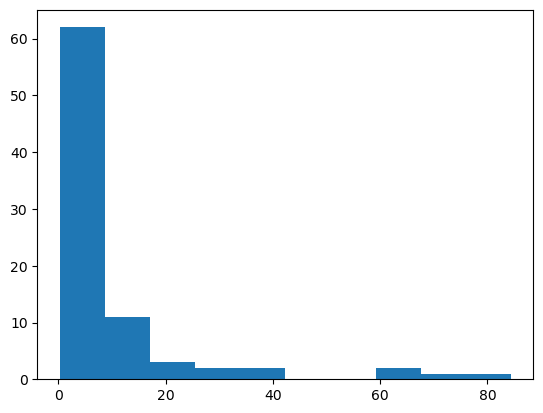

In [24]:
plt.hist(summerfall_more['DEVNLCD06'])
# this predictor is skewed so may be beneficial to transform them (take the log of the predictor and use that as the new predictor)


forest_shrub DEVNLCD06 BFI_AVE HGD are the only parameters with significant p values for the 3day summerfall (and max summerfall)

In [25]:
# maybe the most important watershed characteristics: SLOPE_PCT, DEVNLCD06, HGD, TOPWET then BFI_AVE, STOR_NOR_2009
round(X.corr(),2)

,forest_shrub,emergent,pond,lake,other,SLOPE_PCT,HGD,PERMAVE,HGC,HGCD,DEVNLCD06,DDENS_2009
forest_shrub,1.00,0.51,0.40,0.27,0.03,-0.56,0.03,0.60,-0.35,-0.10,-0.05,0.03
emergent,0.51,1.00,0.34,-0.06,-0.01,-0.42,-0.09,0.17,-0.10,-0.31,-0.22,-0.11
pond,0.40,0.34,1.00,0.31,-0.06,-0.35,0.02,0.17,-0.40,0.22,0.10,0.72
lake,0.27,-0.06,0.31,1.00,-0.07,-0.11,-0.00,0.22,-0.25,0.30,0.30,0.41
other,0.03,-0.01,-0.06,-0.07,1.00,-0.09,-0.04,-0.09,-0.11,-0.11,-0.04,-0.05
SLOPE_PCT,-0.56,-0.42,-0.35,-0.11,-0.09,1.00,-0.44,-0.28,0.47,0.48,-0.35,-0.06
HGD,0.03,-0.09,0.02,-0.00,-0.04,-0.44,1.00,0.07,-0.51,-0.21,0.83,0.07
PERMAVE,0.60,0.17,0.17,0.22,-0.09,-0.28,0.07,1.00,-0.53,0.19,0.10,0.17
HGC,-0.35,-0.10,-0.40,-0.25,-0.11,0.47,-0.51,-0.53,1.00,-0.28,-0.46,-0.50
HGCD,-0.10,-0.31,0.22,0.30,-0.11,0.48,-0.21,0.19,-0.28,1.00,-0.11,0.53



Weighted Least Squares Summary:
                             WLS Regression Results                             
Dep. Variable:     ratio_max_summerfall   R-squared:                       0.482
Model:                              WLS   Adj. R-squared:                  0.395
Method:                   Least Squares   F-statistic:                     5.511
Date:                  Tue, 06 May 2025   Prob (F-statistic):           1.52e-06
Time:                          12:11:27   Log-Likelihood:                   -inf
No. Observations:                    84   AIC:                               inf
Df Residuals:                        71   BIC:                               inf
Df Model:                            12                                         
Covariance Type:              nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:809: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


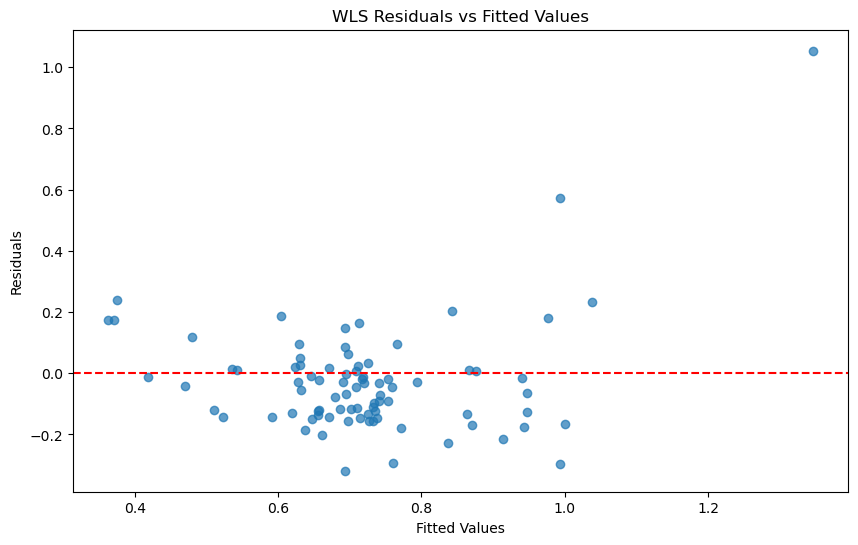

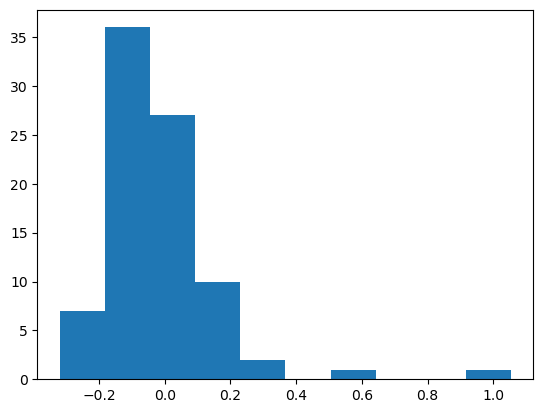

In [26]:
# Calculate weights for WLS Model:
# Variance often scales with the squared residuals
observations_sf = weights_data_summerfall.iloc[:,1] # 1 for the second column which is summerfall

# Fit WLS model
wls_model = sm.WLS(np.sqrt(y), X_with_const, weights=observations_sf).fit()
print("\nWeighted Least Squares Summary:")
print(wls_model.summary())

# Plot Residuals for WLS
wls_residuals = wls_model.resid
plt.figure(figsize=(10, 6))
plt.scatter(wls_model.fittedvalues, wls_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('WLS Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

plt.hist(wls_model.resid)
plt.show()

Now forest_shrub emergent BFI_AVE and HGD are significant (DEVNLCD06 became insignificant)


Initial OLS Summary:
                                OLS Regression Results                               
Dep. Variable:     ratio_sum_3day_summerfall   R-squared:                       0.512
Model:                                   OLS   Adj. R-squared:                  0.430
Method:                        Least Squares   F-statistic:                     6.209
Date:                       Tue, 06 May 2025   Prob (F-statistic):           2.45e-07
Time:                               12:11:28   Log-Likelihood:                 44.251
No. Observations:                         84   AIC:                            -62.50
Df Residuals:                             71   BIC:                            -30.90
Df Model:                                 12                                         
Covariance Type:                   nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/regression/linear_model.py:809: RuntimeWarning: divide by zero encountered in log
  llf += 0.5 * np.sum(np.log(self.weights))


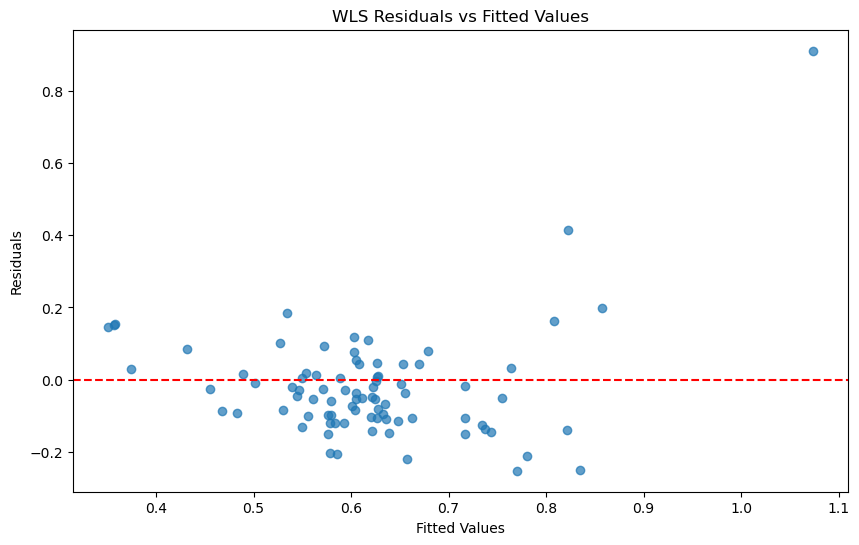

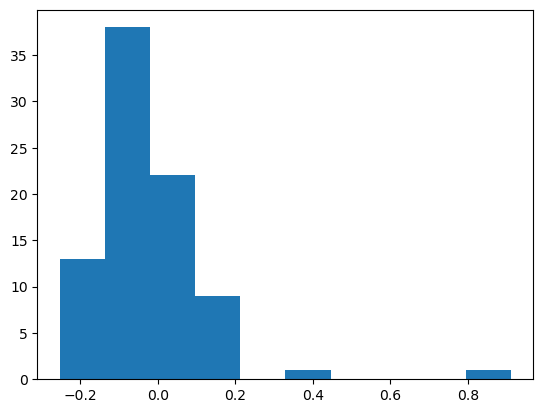

In [27]:
# For summer/fall 3day with more watershed characteristics:
#  Define the dependent variable (target)
y = summerfall_more['ratio_sum_3day_summerfall']
#y = summerfall_more['ratio_max_summerfall']

# Define the independent variables (predictors) and add a constant
X = summerfall_more[['forest_shrub', 'emergent', 'pond', 'lake', 'other', "SLOPE_PCT",'HGD', "PERMAVE", "HGC", "HGCD", 'DEVNLCD06', 'DDENS_2009']]
# DDENS_2009 does not raise the cond. no. while STOR_NOR_2009 does 
X_with_const = sm.add_constant(X)

X_with_const = sm.add_constant(X)

# Fit an initial OLS model to estimate residual variance
ols_model = sm.OLS(np.sqrt(y), X_with_const).fit()
print("Initial OLS Summary:")
print(ols_model.summary())

# Calculate weights for WLS Model:
# Variance often scales with the squared residuals
observations_sf = weights_data_summerfall.iloc[:,1] # 1 for the second column which is summerfall

# Fit WLS model
wls_model = sm.WLS(np.sqrt(y), X_with_const, weights=observations_sf).fit()
print("\nWeighted Least Squares Summary:")
print(wls_model.summary())

# Plot Residuals for WLS
wls_residuals = wls_model.resid
plt.figure(figsize=(10, 6))
plt.scatter(wls_model.fittedvalues, wls_residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('WLS Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

plt.hist(wls_model.resid)
plt.show()

Add a graph to explain weights: Observations vs probability (dot plot with a line of best fit but the points are weighted based on their weights for the WLS)

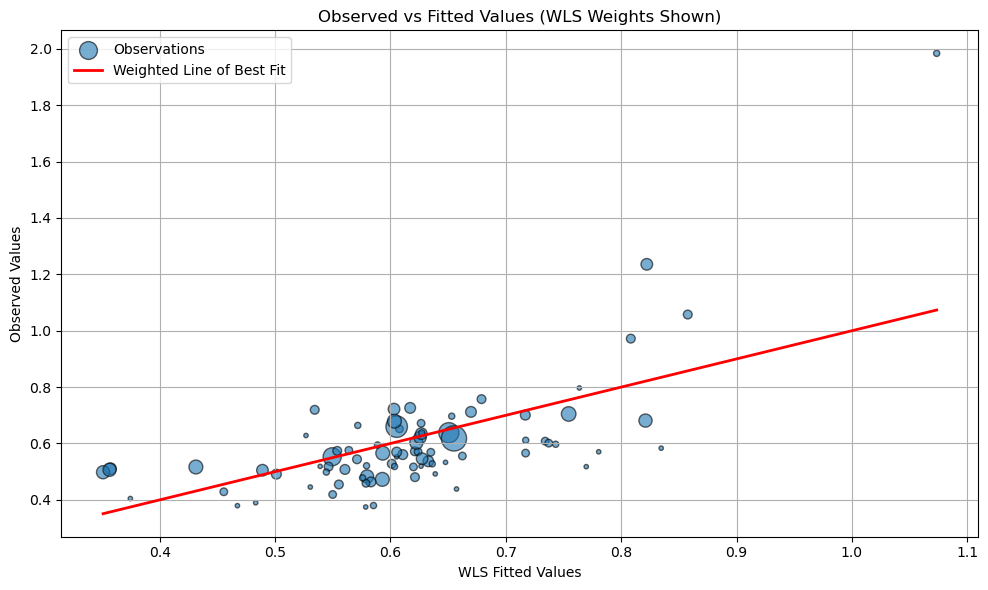

In [28]:
# Predicted (fitted) values
fitted = wls_model.fittedvalues
observed = np.sqrt(y)

# Fit a line using same weights
reg = LinearRegression()
reg.fit(fitted.values.reshape(-1, 1), observed, sample_weight=observations_sf)
line_x = np.linspace(fitted.min(), fitted.max(), 100)
line_y = reg.predict(line_x.reshape(-1, 1))

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(fitted, observed, s=observations_sf * 10, alpha=0.6, label='Observations', edgecolor='k')
plt.plot(line_x, line_y, color='red', label='Weighted Line of Best Fit', linewidth=2)
plt.xlabel("WLS Fitted Values")
plt.ylabel("Observed Values")
plt.title("Observed vs Fitted Values (WLS Weights Shown)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Note the plot above is for the summer/fall data (is the same as the residuals vs fitted plots, but the points are different sizes relative to their weight)